# ทำการ Import Libraries ที่ใช้ในงาน

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.font_manager as fm
from IPython.display import display, Markdown, HTML

# ตั้งค่าการแสดงผลกราฟให้สวยงาม
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'  # ใช้ font ที่รองรับภาษาไทย
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("Set2")

# Download CSV เข้า dataframe

In [60]:
df = pd.read_csv('/content/Global Health Statistics.csv')
df.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


#Cleasing + Prepara Data

# Query ข้อมูลโดยอ้างอิงปี >= 2020


*   Check null
*   Check duplicate















In [61]:
# กรองข้อมูลเฉพาะปี 2020-2024
#df_2020_2024 = df[(df['Year'] >= 2020) & (df['Year'] <= 2024)].copy()
df_2020_2024 = df.query("Year>=2020")
# แสดงข้อมูลเบื้องต้นหลังกรอง
print(f"จำนวนข้อมูลหลังกรอง: {len(df_2020_2024)} จากทั้งหมด {len(df)}")
print("\nตัวอย่างข้อมูล 5 แถวแรกหลังกรอง:")
print(df_2020_2024.head())

print("\nสถิติเชิงพรรณนาของข้อมูลหลังกรอง:")
print(df_2020_2024.describe())

print("\nจำนวนข้อมูลในแต่ละปีหลังกรอง:")
print(df_2020_2024['Year'].value_counts().sort_index())

# ตรวจสอบค่า null
print("\nตรวจสอบค่า null ในข้อมูลที่กรองแล้ว:")
print(df_2020_2024.isnull().sum())

print("\nตรวจสอบจำนวนแถวที่ซ้ำในข้อมูลที่กรองแล้ว:")
print(df_2020_2024.duplicated().sum())

จำนวนข้อมูลหลังกรอง: 200296 จากทั้งหมด 1000000

ตัวอย่างข้อมูล 5 แถวแรกหลังกรอง:
      Country  Year Disease Name Disease Category  Prevalence Rate (%)  \
14  Australia  2020         Zika        Parasitic                17.27   
15        USA  2024       Dengue            Viral                 1.82   
23      Japan  2021     Diabetes       Autoimmune                11.24   
28     Mexico  2022       Rabies     Neurological                11.63   
39      Japan  2022      Malaria        Metabolic                 3.77   

    Incidence Rate (%)  Mortality Rate (%) Age Group  Gender  \
14                1.26                7.08       61+    Male   
15                2.98                7.01     36-60  Female   
23                4.78                5.68     19-35    Male   
28                8.99                0.54     36-60   Other   
39                1.02                3.00      0-18    Male   

    Population Affected  ...  Hospital Beds per 1000  Treatment Type  \
14               

# Analysis of global health statistics

การวิเคราะห์ข้อมูลสถิติสุขภาพโลกเป็นสิ่งสำคัญในการทำความเข้าใจและจัดการกับความท้าทายด้านสุขภาพในปัจจุบัน ชุดข้อมูลนี้รวบรวมสถิติย้อนหลังตั้งแต่ปี 2000 ถึง 2024 (รวม 1,000,000 Rows) โดยเน้นที่โรคต่างๆ การรักษา และผลลัพธ์ของสุขภาพในหลายประเทศ อย่างไรก็ตาม การวิเคราะห์ครั้งนี้จะมุ่งเน้นไปที่ข้อมูลในช่วง 5 ปีล่าสุด (2020-2024) ซึ่งมีจำนวน 200,296 Rows เพื่อให้ได้ข้อมูลเชิงลึกที่ทันสมัยและเกี่ยวข้องกับสถานการณ์ปัจจุบัน

#    1. วิเคราะห์อัตราความชุกของโรค (Prevalence Rate) เฉลี่ยตามประเทศ

อัตราความชุกของโรค (Prevalence Rate) หมายถึงสัดส่วนของผู้ป่วยทั้งหมดในประชากร ณ ช่วงเวลาหนึ่ง ซึ่งใช้ในการวัดความถี่ของการเกิดโรคหรือภาวะนั้นๆ ในประชากร โดยในการวิเคราะห์นี้มีจุดประสงค์เพื่อระบุประเทศที่มีอัตราความชุกของโรคสูงสุด และเปรียบเทียบกับค่าเฉลี่ยของโลกในช่วงปี 2020-2024



2.1 Average Disease Prevalence Rate by Country (2020-2024)

Top 15 countries with the highest average disease prevalence rate (2020-2024):


,Country,Average Prevalence Rate (%)
1,South Korea,10.15
2,Nigeria,10.14
3,Argentina,10.10
4,Mexico,10.09
5,Russia,10.07
6,Japan,10.05
7,UK,10.05
8,Italy,10.05
9,Brazil,10.04
10,Indonesia,10.04


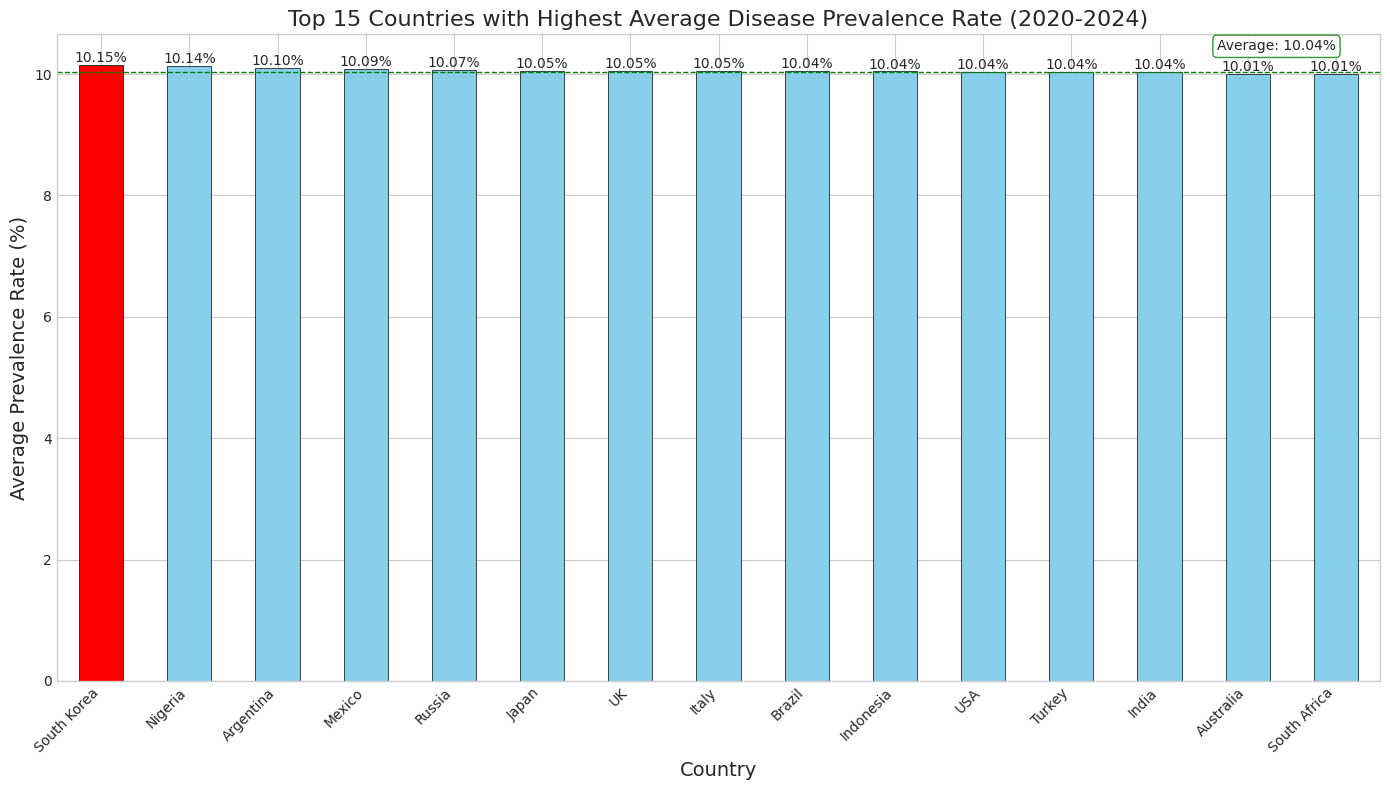

In [62]:
def analyze_disease_distribution_by_country():
    # ใช้ข้อมูลจาก df_2020_2024 ที่กรองแล้ว
    global df_2020_2024

    # 2.1 Average disease prevalence rate by country
    country_prevalence = df_2020_2024.groupby('Country')['Prevalence Rate (%)'].mean().sort_values(ascending=False)

    print("\n2.1 Average Disease Prevalence Rate by Country (2020-2024)")

    # Create a better-looking table with Pandas
    top_countries_df = country_prevalence.head(15).reset_index()
    top_countries_df.columns = ['Country', 'Average Prevalence Rate (%)']
    top_countries_df.index = top_countries_df.index + 1  # Start at 1 instead of 0

    # ฟังก์ชันสำหรับกำหนดสีตัวอักษรแดงเฉพาะแถวแรก โดยไม่เปลี่ยนพื้นหลัง
    def highlight_top_country(row):
        if row.name == 1:  # แถวแรกในตาราง (South Korea)
            return ['color: red'] * len(row)
        else:
            return [''] * len(row)

    # Display the table with formatting
    print("\nTop 15 countries with the highest average disease prevalence rate (2020-2024):")
    display(top_countries_df.style
           .format({'Average Prevalence Rate (%)': '{:.2f}'})
           .apply(highlight_top_country, axis=1))

    # Create a bar chart with improvements
    plt.figure(figsize=(14, 8))
    ax = country_prevalence.head(15).plot(kind='bar',
                                        color=['red'] + ['skyblue']*14,
                                        edgecolor='black',
                                        linewidth=0.5)

    # Add data labels with 2 decimal places
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}%",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 5),
                   textcoords='offset points',
                   fontsize=10)

    plt.title('Top 15 Countries with Highest Average Disease Prevalence Rate (2020-2024)', fontsize=16)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Average Prevalence Rate (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right')

    # Add a horizontal line at the average with 2 decimal places
    avg_value = country_prevalence.mean()
    plt.axhline(y=avg_value, color='green', linestyle='--', linewidth=1)

    # ย้ายตำแหน่งป้ายค่าเฉลี่ยไปที่มุมขวาบน ใกล้กับขอบกราฟ
    plt.text(14, avg_value + 0.3, f'Average: {avg_value:.2f}%',
             va='bottom', ha='right',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='green', boxstyle='round,pad=0.3'))

    plt.tight_layout()
    plt.show()

# เรียกใช้ฟังก์ชัน
analyze_disease_distribution_by_country()

จากการวิเคราะห์ข้อมูล สามารถคาดการณ์แนวโน้มอัตราความชุกของโรคได้ดังนี้:
1.	ความแตกต่างระหว่างประเทศพัฒนาแล้วและกำลังพัฒนา:
- ในประเทศพัฒนาแล้ว เช่น เกาหลีใต้ ญี่ปุ่น สหราชอาณาจักร และสหรัฐอเมริกา พบอัตราความชุกของโรคสูง แม้จะมีระบบสาธารณสุขที่แข็งแกร่ง ซึ่งอาจมีสาเหตุมาจากโรคไม่ติดต่อ (NCDs) เช่น เบาหวาน ความดันโลหิตสูง และโรคหัวใจ รวมถึงการเพิ่มขึ้นของประชากรสูงอายุที่มีความเสี่ยงต่อโรคเรื้อรัง
- ในประเทศกำลังพัฒนา เช่น ไนจีเรีย อินเดีย และแอฟริกาใต้ พบอัตราความชุกของโรคสูงเนื่องจากโรคติดเชื้อ (เช่น มาลาเรีย เอชไอวี และวัณโรค) และการเข้าถึงการรักษาที่จำกัด
2.	ปัจจัยที่มีอิทธิพลต่ออัตราความชุกของโรค:
- การขยายตัวของเมือง: ประเทศที่มีความหนาแน่นของประชากรในเขตเมืองสูง (เช่น เม็กซิโกและบราซิล) มีความเสี่ยงต่อการแพร่ระบาดของโรคติดต่อสูงขึ้น
- การเข้าถึงการดูแลสุขภาพ: ประเทศที่มีระบบการดูแลสุขภาพที่เข้าถึงได้ง่าย (เช่น สหรัฐอเมริกาและสหราชอาณาจักร) อาจมีข้อมูลที่สมบูรณ์กว่า เนื่องจากมีการรายงานที่ครอบคลุมมากขึ้น

# 1.1 โรคที่มีสัดส่วนสูงสุดในประเทศที่มีอัตราความชุกของโรคสูง


Analysis of Top Diseases in High-Prevalence Countries (2020-2024):

Top diseases contributing to high prevalence in South Korea (2020-2024):
- Rabies: 10.63%
- COVID-19: 10.42%
- Hepatitis: 10.37%


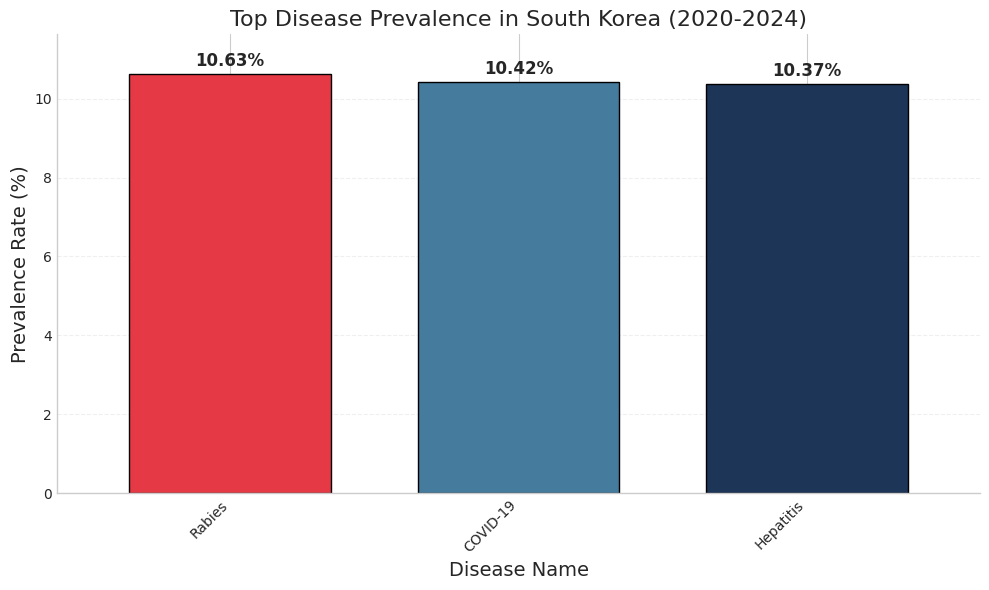


Top diseases contributing to high prevalence in Nigeria (2020-2024):
- Polio: 10.56%
- HIV/AIDS: 10.48%
- Zika: 10.42%


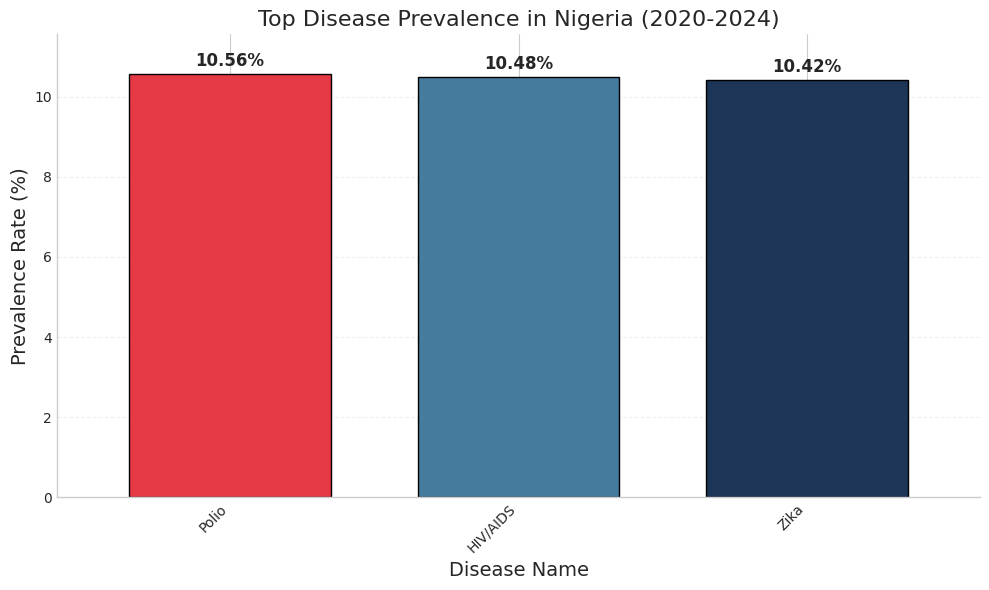


Top diseases contributing to high prevalence in Argentina (2020-2024):
- Polio: 10.59%
- Dengue: 10.53%
- Hypertension: 10.43%


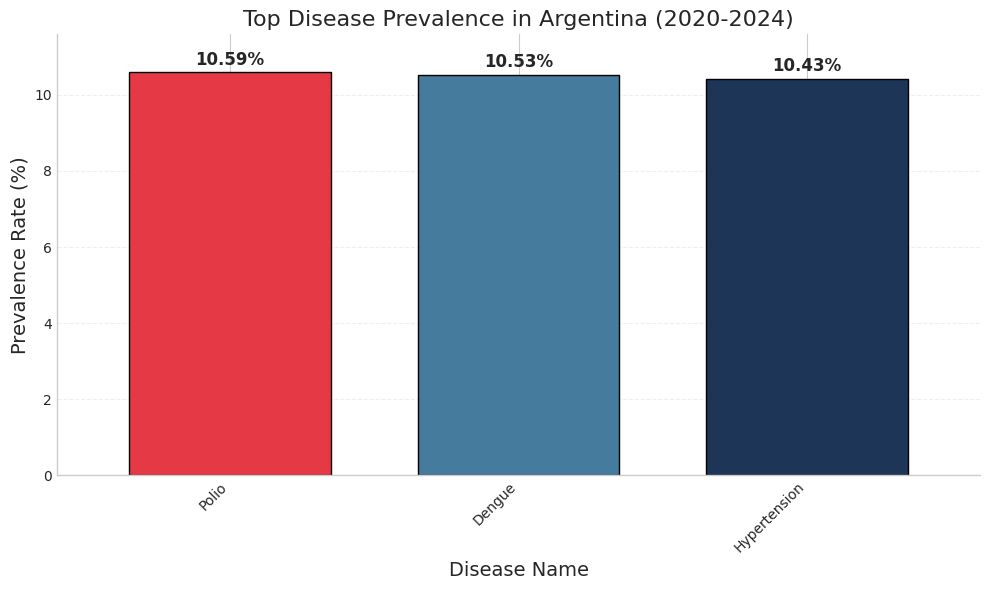

In [63]:
def analyze_top_diseases(df_2020_2024, num_countries=3):
    """
    Analyze specific diseases in high-prevalence countries (2020-2024)
    Args:
        df_2020_2024: DataFrame containing the filtered disease data (2020-2024)
        num_countries: Number of top countries to analyze (default: 3)
    """
    print("\nAnalysis of Top Diseases in High-Prevalence Countries (2020-2024):")
    top_countries = df_2020_2024.groupby('Country')['Prevalence Rate (%)'].mean()\
                    .sort_values(ascending=False).head(15).index.tolist()

    for country in top_countries[:num_countries]:
        country_df = df_2020_2024[df_2020_2024['Country'] == country]
        top_diseases = country_df.groupby('Disease Name')['Prevalence Rate (%)']\
                        .mean().nlargest(3)

        print(f"\nTop diseases contributing to high prevalence in {country} (2020-2024):")
        for disease, rate in top_diseases.items():
            print(f"- {disease}: {rate:.2f}%")

        # Create labeled bar chart
        plt.figure(figsize=(10, 6))
        ax = top_diseases.plot(kind='bar',
                             color=['#E63946', '#457B9D', '#1D3557'],
                             edgecolor='black',
                             width=0.7)

        # Add value labels
        for i, (disease, rate) in enumerate(top_diseases.items()):
            ax.text(i, rate + 0.1, f'{rate:.2f}%',
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    fontweight='bold')

        plt.title(f'Top Disease Prevalence in {country} (2020-2024)', fontsize=16)
        plt.ylabel('Prevalence Rate (%)', fontsize=14)
        plt.xlabel('Disease Name', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.ylim(0, max(top_diseases) + 1)
        plt.grid(axis='y', linestyle='--', alpha=0.3)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.tight_layout()
        plt.show()

analyze_top_diseases(df_2020_2024, num_countries=3)

จากการวิเคราะห์ข้อมูล สามารถคาดการณ์แนวโน้มและข้อเสนอแนะเกี่ยวกับปัญหาสุขภาพได้ดังนี้:
1.	เกาหลีใต้:
- โรคที่มีอัตราความชุกสูงสุดคือ โรคพิษสุนัขบ้า (Rabies), COVID-19 และตับอักเสบ (Hepatitis)
- สิ่งนี้แสดงให้เห็นว่าแม้เกาหลีใต้จะมีระบบสาธารณสุขที่ดี แต่โรคที่เกี่ยวข้องกับสัตว์และการติดเชื้อยังคงเป็นปัญหาสำคัญ
2.	ไนจีเรีย:
- โรคที่มีอัตราความชุกสูงสุดคือ โปลิโอ (Polio), HIV/AIDS และ Zika
- ผลลัพธ์นี้เน้นย้ำถึงความท้าทายด้านสุขภาพที่เกี่ยวข้องกับโรคติดเชื้อในประเทศกำลังพัฒนา ซึ่งมักเกี่ยวข้องกับการเข้าถึงการรักษาและสุขอนามัยที่ไม่ดี
3.	อาร์เจนตินา:
- โรคที่มีอัตราความชุกสูงสุดคือ โปลิโอ (Polio), ไข้เลือดออก (Dengue) และความดันโลหิตสูง (Hypertension)
- แสดงให้เห็นว่าในอาร์เจนตินา มีทั้งโรคติดต่อ และโรคไม่ติดต่อ(NCDs) ที่มีอัตราความชุกสูง

ข้อสังเกต:
- โรคโปลิโอ (Polio) ปรากฏเป็นหนึ่งในสามโรคที่มีอัตราความชุกสูงสุดทั้งในไนจีเรียและอาร์เจนตินา ซึ่งบ่งชี้ถึงความจำเป็นในการเสริมสร้างความพยายามในการกำจัดโรคนี้
- โรคพิษสุนัขบ้า(Rabies) ที่มีอัตราความชุกสูงในประเทศเกาหลีใต้ แสดงให้เห็นถึงความจำเป็นในการเฝ้าระวังโรคที่เกิดจากสัตว์
- โรคความดันโลหิตสูง(Hypertension) ที่มีอัตราความชุกสูงในประเทศอาร์เจนติน่า แสดงให้เห็นถึงปัญหาของโรคไม่ติดต่อ(NCDs)


# 1.2 วิเคราะห์เปรียบเทียบอัตราการเกิดโรคในประเทศพัฒนาแล้วและกำลังพัฒนา

วัตถุประสงค์หลักของการวิเคราะห์นี้คือการศึกษาความแตกต่างของรูปแบบการเกิดโรคระหว่างประเทศพัฒนาแล้วและกำลังพัฒนา โดยจำแนกตามประเภทของโรค


=== Developed vs Developing Country Comparison (2020-2024) ===

• Average prevalence (2020-2024):
  - Developed countries: 10.04%
  - Developing countries: 10.05%

• Prevalence by Disease Category (2020-2024):


,Developed,Developing
Disease Category,,
Autoimmune,10.07%,10.10%
Bacterial,10.02%,10.08%
Cardiovascular,10.08%,10.05%
Chronic,9.86%,10.08%
Genetic,10.09%,10.04%
Infectious,9.99%,10.01%
Metabolic,10.10%,10.06%
Neurological,9.95%,10.17%
Parasitic,10.04%,9.95%


<Figure size 1200x700 with 0 Axes>

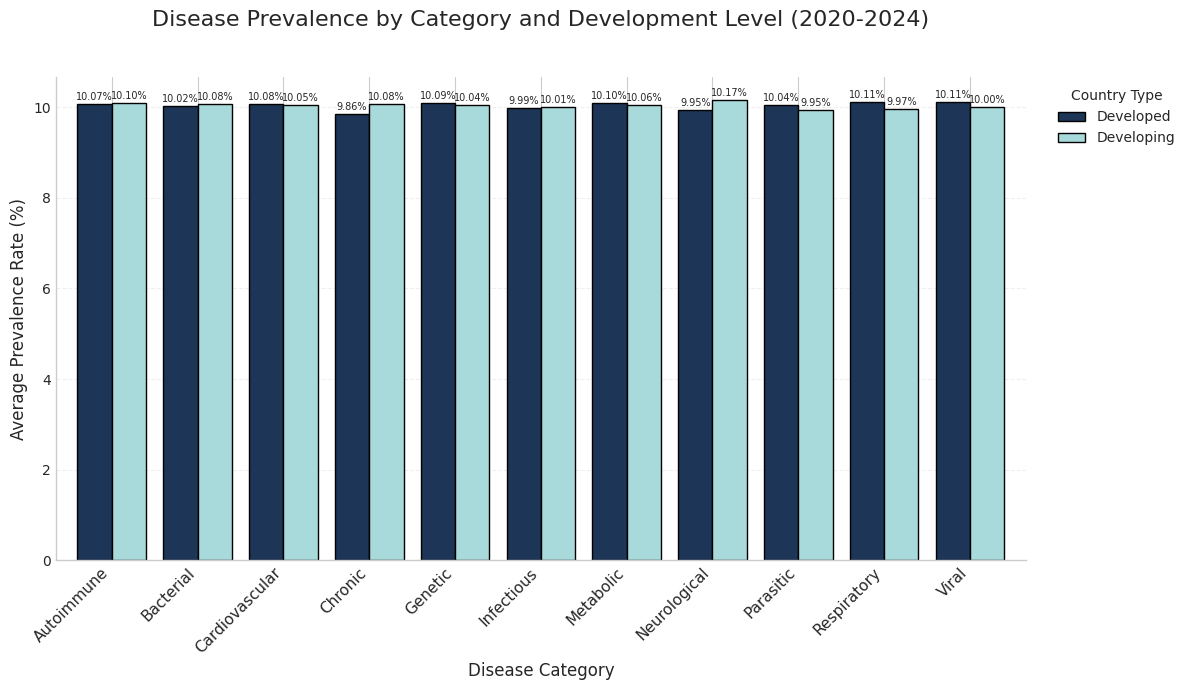

In [64]:
def compare_development_levels(df_2020_2024):
    """
    Compare disease prevalence between developed and developing countries (2020-2024)
    with enhanced visualization and table formatting
    """
    print("\n=== Developed vs Developing Country Comparison (2020-2024) ===")

    # Updated list of developed countries
    developed = [
        'Canada', 'France', 'Italy', 'UK', 'Russia',
        'South Korea', 'Australia', 'Japan', 'USA', 'Germany'
    ]

    developing = [c for c in df_2020_2024['Country'].unique() if c not in developed]

    # Calculate averages
    dev_avg = df_2020_2024[df_2020_2024['Country'].isin(developed)]['Prevalence Rate (%)'].mean()
    developing_avg = df_2020_2024[df_2020_2024['Country'].isin(developing)]['Prevalence Rate (%)'].mean()

    print(f"\n• Average prevalence (2020-2024):")
    print(f"  - Developed countries: {dev_avg:.2f}%")
    print(f"  - Developing countries: {developing_avg:.2f}%")

    if 'Disease Category' in df_2020_2024.columns:
        # Create comparison dataframe
        dev_cats = df_2020_2024[df_2020_2024['Country'].isin(developed)].groupby('Disease Category')['Prevalence Rate (%)'].mean()
        developing_cats = df_2020_2024[df_2020_2024['Country'].isin(developing)].groupby('Disease Category')['Prevalence Rate (%)'].mean()

        comparison_df = pd.DataFrame({
            'Developed': dev_cats,
            'Developing': developing_cats
        }).sort_index()

        # Display styled table
        print("\n• Prevalence by Disease Category (2020-2024):")
        styled_df = comparison_df.style\
            .format('{:.2f}%')\
            .set_properties(**{'text-align': 'center'})\
            .set_table_styles([
                {'selector': 'th', 'props': [('background-color', '#1D3557'), ('color', 'white')]},
                {'selector': 'td', 'props': [('padding', '8px')]},
                {'selector': '', 'props': [('border', '1px solid #ddd')]}
            ])
        display(styled_df)

        # Create enhanced bar chart with smaller font size for labels
        plt.figure(figsize=(12, 7))
        ax = comparison_df.plot(kind='bar',
                              color=['#1D3557', '#A8DADC'],
                              edgecolor='black',
                              width=0.8,
                              figsize=(12, 7))

        # Add value labels with reduced font size
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}%',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center',
                       va='center',
                       xytext=(0, 5),
                       textcoords='offset points',
                       fontsize=7)

        # Chart formatting
        plt.title('Disease Prevalence by Category and Development Level (2020-2024)\n',
                 fontsize=16, pad=20)
        plt.ylabel('Average Prevalence Rate (%)', fontsize=12)
        plt.xlabel('Disease Category', fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=11)
        plt.yticks(fontsize=10)
        plt.ylim(0, comparison_df.values.max() + 0.5)

        # Move legend outside the plot
        plt.legend(title='Country Type',
                  bbox_to_anchor=(1.02, 1),
                  loc='upper left',
                  frameon=False)

        # Add grid and clean borders
        plt.grid(axis='y', linestyle='--', alpha=0.3)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        plt.tight_layout()
        plt.show()

# Run the function with filtered data
compare_development_levels(df_2020_2024)

จากการวิเคราะห์ข้อมูล สามารถคาดการณ์ได้ ดังนี้
1.   อัตราความชุกโดยเฉลี่ย:
- ประเทศพัฒนาแล้วมีอัตราความชุกเฉลี่ย 10.04%
- ประเทศกำลังพัฒนา มีอัตราความชุกเฉลี่ย 10.05%
- ความแตกต่างของอัตราความชุกเฉลี่ยระหว่างสองกลุ่มประเทศนี้มีค่าน้อยมาก แสดงให้เห็นว่าโดยรวมแล้ว อัตราความชุกของโรคไม่ได้แตกต่างกันอย่างมีนัยสำคัญระหว่างประเทศพัฒนาแล้วและกำลังพัฒนา
2.  ข้อสังเกต:
-   แม้จะมีความแตกต่างในระบบสาธารณสุขและปัจจัยทางเศรษฐกิจและสังคม แต่โดยรวมแล้วอัตราความชุกของโรคไม่ได้แตกต่างกันอย่างมากระหว่างประเทศพัฒนาแล้วและกำลังพัฒนา



# 2. วิเคราะห์อันดับประเทศที่มีอัตราการเสียชีวิตสูงสุด (Mortality Rate)

จุดประสงค์ในการวิเคราะห์ เพื่อระบุและเปรียบเทียบอัตราการเสียชีวิตเฉลี่ยของ 15 ประเทศที่มีอัตราการเสียชีวิตสูงสุดกับค่าเฉลี่ยทั่วโลก


Country Mortality Rate Report (2020-2024)


Rank,Country,Mortality Rate (%),Vs Average
1,Mexico,5.09%,+0.04%
2,Indonesia,5.09%,+0.04%
3,UK,5.07%,+0.03%
4,Turkey,5.07%,+0.03%
5,Germany,5.07%,+0.02%
6,Italy,5.06%,+0.01%
7,Japan,5.06%,+0.01%
8,Brazil,5.06%,+0.01%
9,France,5.05%,+0.01%
10,Canada,5.04%,-0.00%


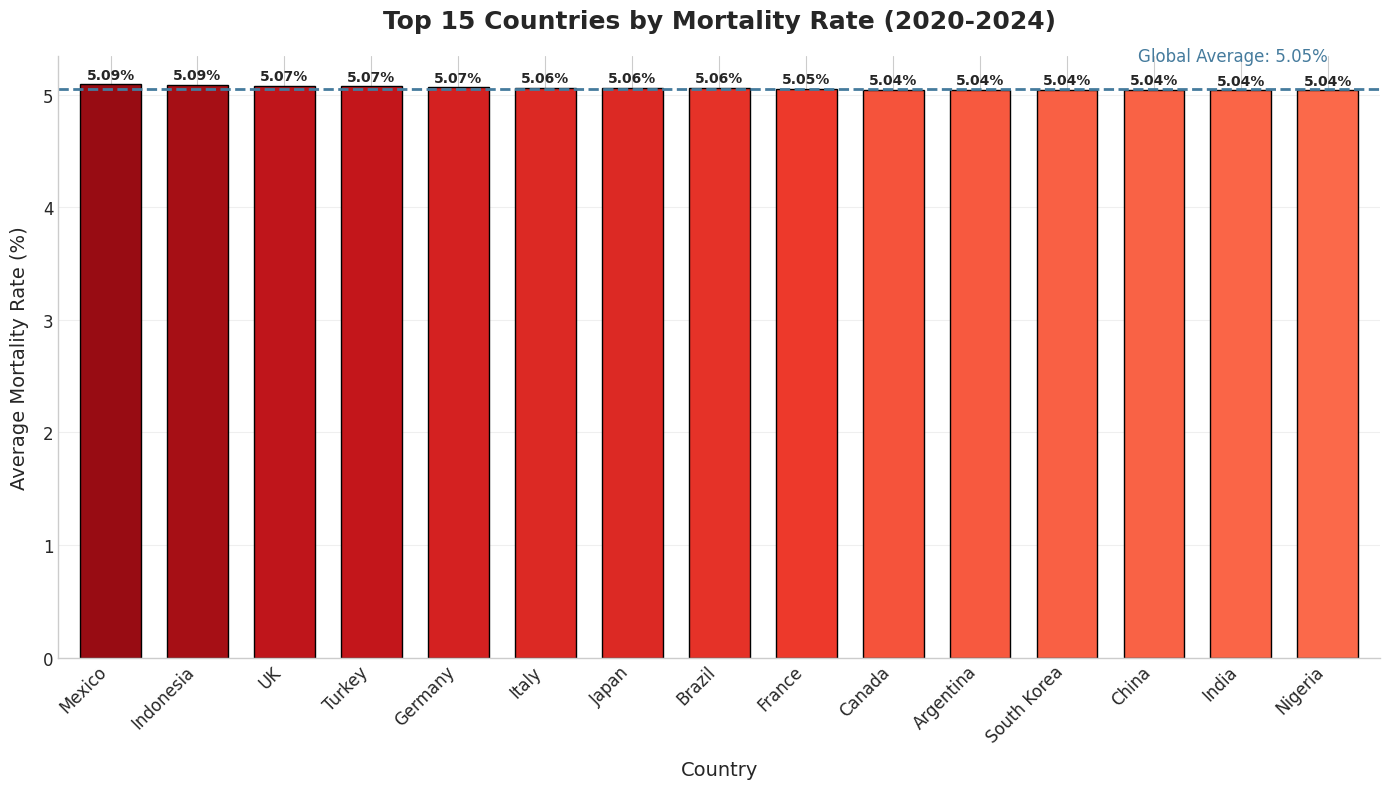

In [65]:
def plot_vertical_mortality_with_labels(df_2020_2024, top_n=15):
    """
    Displays a vertical bar chart of countries with highest mortality rates including data labels (2020-2024)

    Parameters:
        df_2020_2024 (DataFrame): Global health statistics data (2020-2024)
        top_n (int): Number of countries to display
    """
    # Calculate average mortality rate by country
    country_mortality = df_2020_2024.groupby('Country')['Mortality Rate (%)'].mean().sort_values(ascending=False)
    global_avg = country_mortality.mean()

    # Create vertical bar chart
    plt.figure(figsize=(14, 8))

    # Use color gradient based on value
    top_countries = country_mortality.head(top_n)
    normalized_values = (top_countries.values - top_countries.min()) / (top_countries.max() - top_countries.min())
    color_values = 0.5 + normalized_values * 0.4
    color_gradient = plt.cm.Reds(color_values)

    ax = top_countries.plot(
        kind='bar',
        color=color_gradient,
        edgecolor='black',
        width=0.7
    )

    # Add global average line
    plt.axhline(y=global_avg, color='#457b9d', linestyle='--', linewidth=2)
    plt.text(top_n-1, global_avg*1.05, f'Global Average: {global_avg:.2f}%',
              ha='right', color='#457b9d', fontsize=12)

    # Add data labels on each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}%",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 7),
                    textcoords='offset points',
                    fontsize=10,
                    fontweight='bold')

    # Customize chart
    plt.title(f'Top {top_n} Countries by Mortality Rate (2020-2024)',
               fontsize=18, pad=20, fontweight='bold')
    plt.xlabel('Country', fontsize=14, labelpad=10)
    plt.ylabel('Average Mortality Rate (%)', fontsize=14, labelpad=10)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Create summary table with ranking
    top_table = country_mortality.head(top_n).reset_index()
    top_table.columns = ['Country', 'Mortality Rate (%)']
    top_table['Vs Average'] = top_table['Mortality Rate (%)'] - global_avg

    # Add rank column starting from 1
    top_table.insert(0, 'Rank', range(1, 1 + len(top_table)))

    print(f"\n{'='*60}\nCountry Mortality Rate Report (2020-2024)\n{'='*60}")

    # Style the table with ranking
    styled_table = (top_table.style
        .format({
            'Mortality Rate (%)': '{:.2f}%',
            'Vs Average': '{:+.2f}%'
        })
        .background_gradient(subset=['Mortality Rate (%)'], cmap='Reds')
        .bar(subset=['Vs Average'], align='mid', color=['#ff7f7f', '#5fba7d'])
        .set_properties(**{
            'text-align': 'center',
            'border': '1px solid #ddd',
            'padding': '8px'
        })
        .set_table_styles([{
            'selector': 'th',
            'props': [
                ('background-color', '#2c3e50'),
                ('color', 'white'),
                ('font-weight', 'bold')
            ]
        }])
        .hide(axis='index')  # Hide the default index
    )

    display(styled_table)
    plt.tight_layout()
    plt.show()

# Run the function
plot_vertical_mortality_with_labels(df_2020_2024)

จากการวิเคราะห์ข้อมูล สามารถคาดการณ์ได้ ดังนี้:

- อันดับประเทศ: ตารางแสดง 15 ประเทศที่มีอัตราการเสียชีวิตเฉลี่ยสูงสุด โดยเม็กซิโกและอินโดนีเซียครองอันดับ 1 ร่วมกัน ด้วยอัตรา 5.09%
- อัตราการเสียชีวิตเฉลี่ย: ประเทศส่วนใหญ่มีอัตราการเสียชีวิตเฉลี่ยใกล้เคียงกัน โดยอยู่ในช่วง 5.04% ถึง 5.09%
ความแตกต่าง: ความแตกต่างของอัตราการเสียชีวิตระหว่างประเทศใน 15 อันดับแรกนั้นค่อนข้างน้อย โดยมีความแตกต่างกันเพียง 0.05% เท่านั้น

ข้อสังเกต:
- แม้ว่าความแตกต่างของอัตราการเสียชีวิตระหว่างประเทศจะไม่มาก แต่ก็ยังคงมีความแตกต่างที่น่าสนใจ โดยเฉพาะอย่างยิ่งเมื่อเปรียบเทียบกับค่าเฉลี่ยทั่วโลก
- ประเทศที่มีอัตราการเสียชีวิตสูงกว่าค่าเฉลี่ยทั่วโลก อาจต้องการการวิเคราะห์เพิ่มเติมเพื่อระบุปัจจัยที่ส่งผลต่ออัตราการเสียชีวิตที่สูงขึ้น
- 	ประเทศพัฒนาแล้วหลายประเทศยังคงมีอัตราการตายที่สูงกว่าค่าเฉลี่ยโลก


# 3. การวิเคราะห์ค่ารักษาพยาบาล: 10 โรคสำคัญที่มีค่าใช้จ่ายสูง (Top 10 Most Expensive Diseases to Treat)

จุดประสงค์ในการวิเคราะห์:
เพื่อระบุและเปรียบเทียบค่ารักษาพยาบาลเฉลี่ยของ 10 โรคที่มีค่ารักษาพยาบาลแพงที่สุด ในช่วงปี 2020-2024


Top 10 Most Expensive Diseases to Treat (2020-2024)

Detailed Cost Comparison (2020-2024):


Rank,Disease,Avg Cost,Prevalence,Mortality,% Above Avg
1,Influenza,"$25,456.73",10.0%,5.0%,1.7%
2,Polio,"$25,170.01",10.1%,5.1%,0.5%
3,HIV/AIDS,"$25,160.76",10.0%,5.0%,0.5%
4,Hypertension,"$25,138.52",10.0%,5.1%,0.4%
5,Dengue,"$25,110.37",10.1%,5.1%,0.3%
6,Ebola,"$25,108.06",10.0%,5.0%,0.3%
7,Tuberculosis,"$25,088.63",10.0%,5.0%,0.2%
8,COVID-19,"$25,064.29",10.1%,5.0%,0.1%
9,Parkinson's Disease,"$25,060.85",10.0%,5.1%,0.1%
10,Zika,"$25,040.70",10.0%,5.1%,0.0%


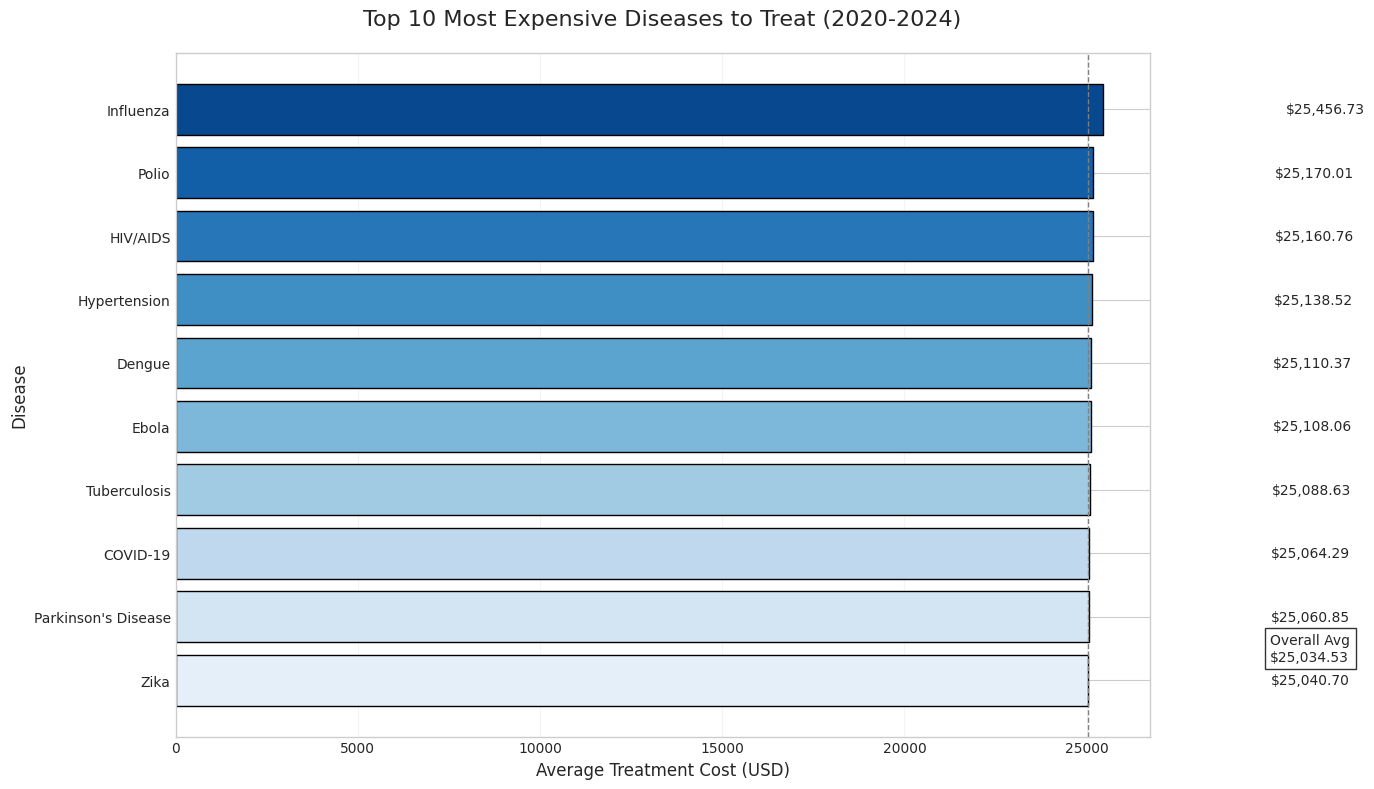

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

def format_currency(value):
    """Format number as currency with comma separators and 2 decimal places"""
    return "${:,.2f}".format(value)

def compare_top10_expensive_diseases(df_2020_2024):
    """
    Compare the top 10 most expensive diseases to treat (2020-2024)
    """
    # ตรวจสอบคอลัมน์ที่จำเป็น
    required_cols = ['Disease Name', 'Average Treatment Cost (USD)']
    missing_cols = [col for col in required_cols if col not in df_2020_2024.columns]

    if missing_cols:
        print(f"Error: Missing required columns - {missing_cols}")
        print("Available columns:", df_2020_2024.columns.tolist())
        return None

    print("\n" + "="*60)
    print("Top 10 Most Expensive Diseases to Treat (2020-2024)")
    print("="*60)

    # คำนวณสถิติของโรค
    disease_stats = df_2020_2024.groupby('Disease Name').agg({
        'Average Treatment Cost (USD)': 'mean',
        'Prevalence Rate (%)': 'mean',
        'Mortality Rate (%)': 'mean'
    }).rename(columns={'Average Treatment Cost (USD)': 'Avg Cost'})

    # คำนูณค่าเฉลี่ยของทุกโรค
    overall_avg = df_2020_2024['Average Treatment Cost (USD)'].mean()

    # คำนวณ % สูงกว่าค่าเฉลี่ย
    disease_stats['% Above Avg'] = ((disease_stats['Avg Cost'] - overall_avg) / overall_avg * 100).round(1)

    # เรียงลำดับตามค่าใช้จ่ายจากมากไปน้อย
    top10 = disease_stats.nlargest(10, 'Avg Cost').sort_values('Avg Cost', ascending=False)

    # เพิ่มคอลัมน์ลำดับ
    top10 = top10.reset_index()
    top10.insert(0, 'Rank', range(1, 1+len(top10)))

    # ==============================
    # 🔹 กราฟ: ค่าใช้จ่ายรักษา 10 โรคที่แพงที่สุด
    # ==============================
    plt.figure(figsize=(14, 8))

    # ใช้สีไล่เฉดฟ้าจากเข้มไปอ่อน
    palette = sns.color_palette("Blues_r", len(top10))

    # เรียงลำดับจากค่าสูงสุดลงมา
    bars = plt.barh(top10['Disease Name'][::-1], top10['Avg Cost'][::-1],
                   color=palette[::-1], edgecolor='black')

    # ใส่ตัวเลขบนแท่งกราฟ
    for i, (value, name) in enumerate(zip(top10['Avg Cost'][::-1], top10['Disease Name'][::-1])):
        plt.text(value + 5000, i, f"{format_currency(value)}", va='center', fontsize=10)

    # เส้นค่าเฉลี่ย
    plt.axvline(overall_avg, color='gray', linestyle='--', linewidth=1)
    plt.text(overall_avg + 5000, 0.5, f'Overall Avg\n{format_currency(overall_avg)}',
             va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    # ตั้งค่ากราฟ
    plt.title('Top 10 Most Expensive Diseases to Treat (2020-2024)', fontsize=16, pad=20)
    plt.xlabel('Average Treatment Cost (USD)', fontsize=12)
    plt.ylabel('Disease', fontsize=12)
    plt.grid(axis='x', alpha=0.2)
    plt.tight_layout()

    # ==============================
    # 🔹 ตาราง: ค่าใช้จ่ายและ % Above Avg
    # ==============================
    print("\nDetailed Cost Comparison (2020-2024):")

    # เตรียมข้อมูลตาราง
    comp_table = top10[['Rank', 'Disease Name', 'Avg Cost',
                       'Prevalence Rate (%)', 'Mortality Rate (%)', '% Above Avg']]
    comp_table.columns = ['Rank', 'Disease', 'Avg Cost', 'Prevalence', 'Mortality', '% Above Avg']

    # สไตล์ของตาราง
    styled_table = (comp_table.style
        .format({
            'Avg Cost': format_currency,
            'Prevalence': '{:.1f}%',
            'Mortality': '{:.1f}%',
            '% Above Avg': '{:.1f}%'
        })
        .background_gradient(subset=['Avg Cost'], cmap='Blues')
        .bar(subset=['% Above Avg'], color=['#444444', '#5fba7d'] if comp_table['% Above Avg'].ge(0).all() else ['#ff4d4d', '#5fba7d'], align='mid')
        .set_properties(**{
            'text-align': 'center',
            'border': '1px solid #ddd',
            'padding': '8px'
        })
        .set_table_styles([{
            'selector': 'th',
            'props': [('background-color', '#2c3e50'),
                      ('color', 'white'),
                      ('font-size', '12px'),
                      ('text-align', 'center')]
        }, {
            'selector': 'caption',
            'props': [('caption-side', 'top'),
                      ('font-size', '16px'),
                      ('font-weight', 'bold'),
                      ('color', '#2c3e50')]
        }])
        .set_caption('🔹 Top 10 Most Expensive Diseases Analysis (2020-2024)')
        .hide(axis='index')  # ซ่อน index เดิม
    )

    display(styled_table)
    plt.show()
    return comp_table

# Run the function with filtered data
top10_diseases = compare_top10_expensive_diseases(df_2020_2024)

จากการวิเคราะห์ข้อมูล สามารถคาดการณ์ได้ ดังนี้:

รูปแบบค่าใช้จ่าย:
- โรคติดเชื้อ (ไข้หวัดใหญ่, โปลิโอ, เอชไอวี/เอดส์) และโรคไม่ติดต่อ (ความดันโลหิตสูง) มีค่าใช้จ่ายในการรักษาสูง
- ความแตกต่างของค่าใช้จ่ายระหว่าง 10 โรคแรกมีค่าน้อยมาก (ไม่เกิน 1.7%)

ข้อสังเกต:
- ระบบสาธารณสุขทั่วโลกเผชิญกับความท้าทายในการควบคุมค่าใช้จ่ายในการรักษา
- การจัดลำดับความสำคัญและการป้องกันโรค อาจเป็นแนวทางในการเพิ่มประสิทธิภาพการใช้ทรัพยากร


# 4. วิเคราะห์เฉพาะ Covid-19

ทำการเลือกข้อมูลคอลัม ประเทศ ปี จำนวนผู้ติดเชื้อ อัตราการเสียชีวิต และอัตราการรักษา

In [67]:
df_Covid = df_2020_2024.query("`Disease Name` == 'COVID-19'")[["Country", "Year", "Population Affected", "Mortality Rate (%)", "Recovery Rate (%)"]]
group1 = (
    df_Covid.groupby(["Country","Year"],group_keys=False)
    .agg({"Population Affected": "sum","Recovery Rate (%)":"mean","Mortality Rate (%)" : "mean"})
    .map(lambda x: round(x, 2))
    )
group1

Population Affected  Recovery Rate (%)  Mortality Rate (%)
Country   Year                                                            
Argentina 2020             57519556              74.51                4.99
          2021             56036473              72.71                5.26
          2022             49423396              74.87                5.14
          2023             48365734              73.31                5.21
          2024             58473641              73.91                5.20
...                             ...                ...                 ...
USA       2020             56668525              73.93                4.49
          2021             53079516              74.65                5.16
          2022             47046928              75.09                4.72
          2023             50357751              74.76                4.63
          2024             52684341              73.29                4.96

[100 rows x 3 columns]

# 4.1 แสดงกราฟจำนวนผู้ติดเชื้อ Covid-19 โดยแยกรายปี ตามแต่ละประเทศ

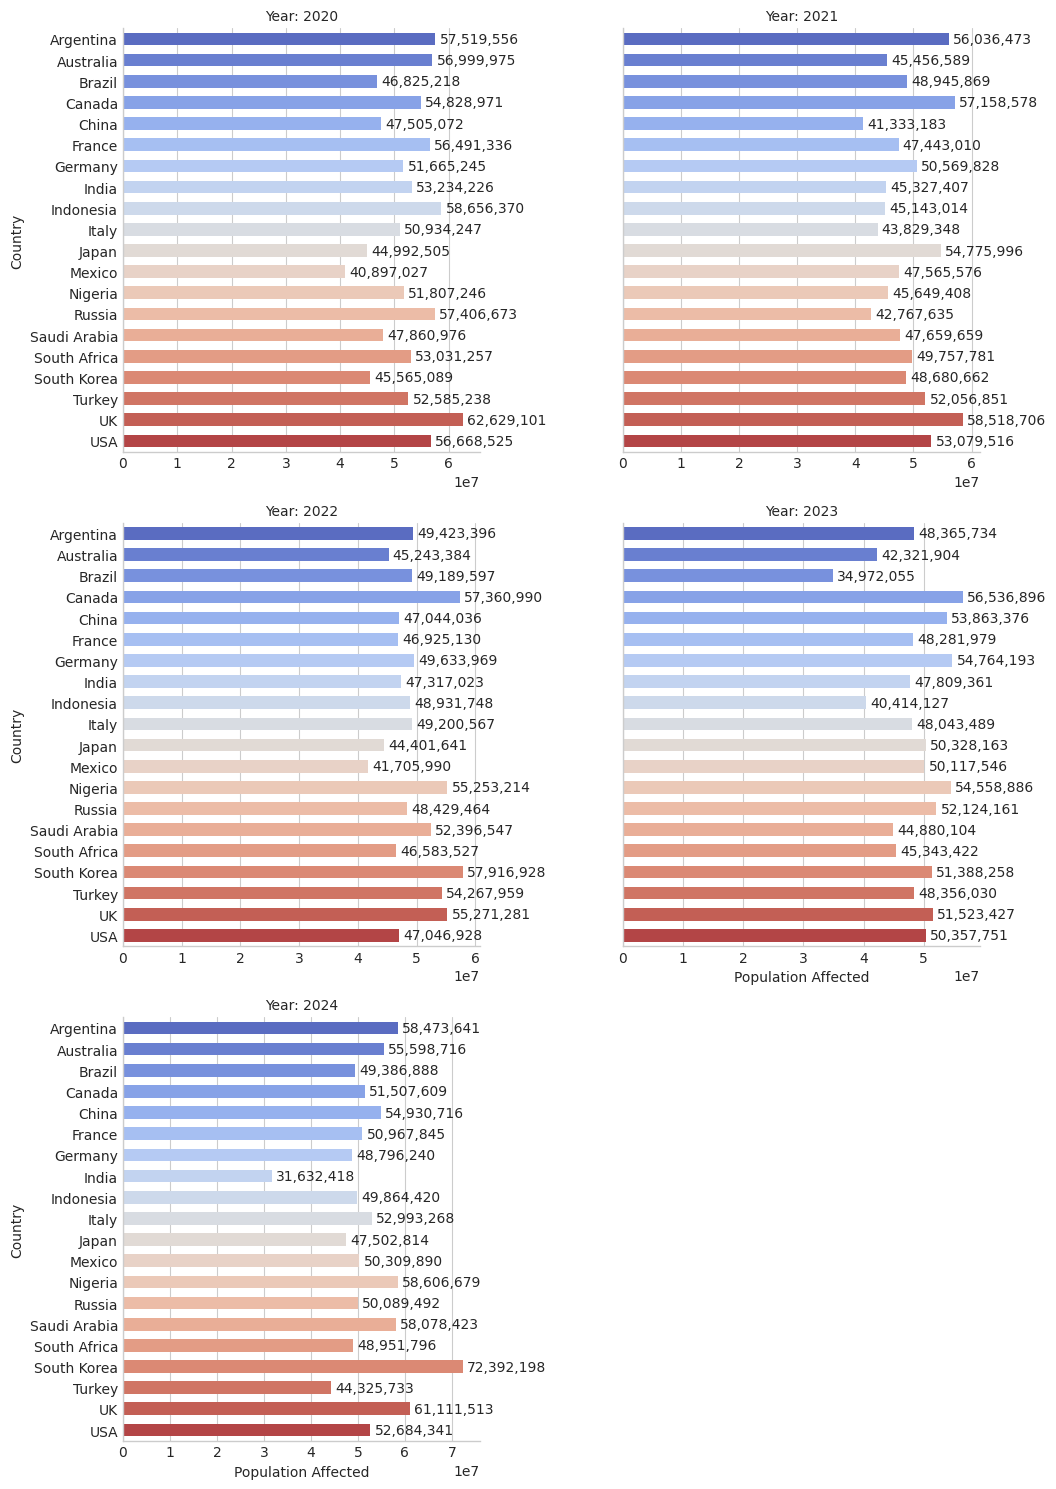

In [68]:
df_plot_covid = group1.reset_index()

g = sns.FacetGrid(df_plot_covid, col="Year", col_wrap=2, height=5, sharex=False)

g.map_dataframe(
    sns.barplot,
    x="Population Affected",
    y="Country",
    hue="Country",
    palette="coolwarm",
    width=0.6,
    legend=False
)

for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, label_type="edge", fontsize=10, padding=3, labels=[f"{p.get_width():,.0f}" for p in container])

g.set_axis_labels("Population Affected", "Country")
g.set_titles("Year: {col_name}")
g.figure.subplots_adjust(wspace=0.4)
plt.show()


# 4.2 จัดอันดับข้อมูล

*   5 อันดับผู้ติดเชื้อ Covid-19 สูงสุด ตามประเทศและปี
*   5 อันดับอัตราการรักษาหายของโรค Covid-19 สูงสุด ตามประเทศและปี
*   5 อันดับอัตราการเสียชีวิตจาก Covid-19 สูงสุด ตามประเทศและปี


In [69]:
print(f"==== Top 5 Population Affected ====\n")
x1 = group1.sort_values(by="Population Affected",ascending=False).head(5)
display(x1)
print(f"\n==== Top 5 Recovery rate ====\n")
x2 = group1.sort_values(by="Recovery Rate (%)",ascending=False).head(5)
display(x2)
print(f"\n==== Top 5 Mortality rate ====\n")
x3 = group1.sort_values(by="Mortality Rate (%)",ascending=False).head(5)
display(x3)


==== Top 5 Population Affected ====



Population Affected  Recovery Rate (%)  Mortality Rate (%)
Country     Year                                                            
South Korea 2024             72392198              73.59                5.35
UK          2020             62629101              75.01                5.04
            2024             61111513              73.43                4.80
Indonesia   2020             58656370              72.83                4.96
Nigeria     2024             58606679              75.70                4.90


==== Top 5 Recovery rate ====



,,Population Affected,Recovery Rate (%),Mortality Rate (%)
Country,Year,,,
China,2024,54930716,79.42,5.20
Australia,2024,55598716,77.59,4.79
Saudi Arabia,2022,52396547,77.52,4.54
Mexico,2023,50117546,76.94,5.36
France,2020,56491336,76.85,4.78



==== Top 5 Mortality rate ====



,,Population Affected,Recovery Rate (%),Mortality Rate (%)
Country,Year,,,
Canada,2023,56536896,72.60,5.80
India,2024,31632418,73.05,5.57
Mexico,2022,41705990,74.13,5.57
France,2024,50967845,73.80,5.56
Brazil,2022,49189597,72.77,5.47


# 4.3 วิเคราะห์ค่าใช้จ่ายในการรักษา Covid-19



ทำการจัดกลุ่มตามประเทศและปี โดยเลือกแสดงข้อมูล Column

*   รายได้เฉลี่ยของประชากรในประเทศตามแต่ละปี
*   ค่ารักษาเฉลี่ยของโรค Covid-19 ในประเทศตามแต่ละปี
*   อัตราส่วนของค่าใช้จ่ายเฉลี่ยในการรักษากับรายได้เฉลี่ย


In [70]:
df_cost = df_2020_2024.query("`Disease Name` == 'COVID-19'")[["Country", "Year", "Average Treatment Cost (USD)", "Per Capita Income (USD)"]]

group2 = (
    df_cost.groupby(["Country", "Year"], group_keys=False)
    .agg({"Average Treatment Cost (USD)": "mean", "Per Capita Income (USD)": "mean"})
    .assign(
        Proportion = lambda x:(x["Average Treatment Cost (USD)"] / x["Per Capita Income (USD)"]))
    .map(lambda x: round(x, 2)
    )
)
group2

Average Treatment Cost (USD)  Per Capita Income (USD)  \
Country   Year                                                          
Argentina 2020                      25772.16                 50928.61   
          2021                      28322.69                 46069.07   
          2022                      20989.48                 52490.50   
          2023                      25529.66                 48218.63   
          2024                      23544.09                 46521.10   
...                                      ...                      ...   
USA       2020                      23471.89                 57029.96   
          2021                      25988.81                 48886.13   
          2022                      25243.32                 54726.43   
          2023                      23649.73                 52017.99   
          2024                      25962.94                 53812.69   

                Proportion  
Country   Year              
Argentina 2020        0.51  
          2021        0.61  
          2022        0.40  
          2023        0.53  
          2024        0.51  
...                    ...  
USA       2020        0.41  
          2021        0.53  
          2022        0.46  
          2023        0.45  
          2024        0.48  

[100 rows x 3 columns]

# 4.4 จัดอันดับข้อมูลและพิจารณาข้อมูล






*   5 อันดับอัตราส่วนระหว่างค่ารักษาเฉลี่ยและรายได้เฉลี่ยต่ำสุด
*   เปรียบเทียบ 5 อันดับประเทศและปีที่มีอัตราการรักษาหายมากที่สุดเทียบกับรายได้และค่ารักษาพยาบาล
*   เปรียบเทียบ 5 อันดับประเทศและปีที่มีอัตราการเสียชีวิตมากที่สุดเทียบกับรายได้และค่ารักษาพยาบาล


In [71]:
print(f"==== Top 5 country_year based on proportion between avg_cost and avg_income ====\n")
y1 = group2.sort_values(by="Proportion",ascending=True).head(5)
display(y1)

print(f"\n==== Focus on the top 5 Recovery rates based on the proportion between avg_cost and avg_income. ====\n")
y2 = x2.merge(group2, on=["Country","Year"], how="inner")
display(y2)

print(f"\n==== Focus on the top 5 Mortality rates based on the proportion between avg_cost and avg_income. ====\n")
y3 = x3.merge(group2, on=["Country","Year"], how="inner")
display(y3)

==== Top 5 country_year based on proportion between avg_cost and avg_income ====



,,Average Treatment Cost (USD),Per Capita Income (USD),Proportion
Country,Year,,,
Brazil,2022,21722.74,55479.37,0.39
Argentina,2022,20989.48,52490.50,0.40
USA,2020,23471.89,57029.96,0.41
Germany,2021,22838.15,54141.35,0.42
South Africa,2021,23493.31,55784.96,0.42



==== Focus on the top 5 Recovery rates based on the proportion between avg_cost and avg_income. ====



,,Population Affected,Recovery Rate (%),Mortality Rate (%),Average Treatment Cost (USD),Per Capita Income (USD),Proportion
Country,Year,,,,,,
China,2024,54930716,79.42,5.20,25483.00,46446.46,0.55
Australia,2024,55598716,77.59,4.79,24075.99,49441.12,0.49
Saudi Arabia,2022,52396547,77.52,4.54,24407.09,50396.84,0.48
Mexico,2023,50117546,76.94,5.36,27055.89,47726.72,0.57
France,2020,56491336,76.85,4.78,26620.58,48256.14,0.55



==== Focus on the top 5 Mortality rates based on the proportion between avg_cost and avg_income. ====



,,Population Affected,Recovery Rate (%),Mortality Rate (%),Average Treatment Cost (USD),Per Capita Income (USD),Proportion
Country,Year,,,,,,
Canada,2023,56536896,72.60,5.80,24150.41,52037.02,0.46
India,2024,31632418,73.05,5.57,25277.33,49694.85,0.51
Mexico,2022,41705990,74.13,5.57,24240.58,54753.15,0.44
France,2024,50967845,73.80,5.56,25507.76,47762.41,0.53
Brazil,2022,49189597,72.77,5.47,21722.74,55479.37,0.39


จากข้อมูลในตาราง



1.   เมื่อพิจารณา 5 อันดับที่ Recovery rate สูงกับ Proportion พบว่ากลุ่มนี้จะมีอัตราค่ารักษาพยาบาลเฉลี่ยต่อรายได้เฉลี่ยราวๆ 48-57% ซึ่งถือว่าสูงมาก อาจจะสะท้อนเรื่องเทคโนโลยีในการรักษาหรืออุปกรณ์ทางการแพทย์ที่ล้ำสมัยกว่ากลุ่มอืนๆ จึงส่งผลให้อัตราการรักษาหายสูงขึ้น

2.   เมื่อพิจารณา 5 อันดับที่ Mortality Rate สูงกับ Proportion พบว่ากลุ่มนี้จะมีอัตราค่ารักษาพยาบาลเฉลี่ยต่อรายได้เฉลี่ยราวๆ 39-53% ซึ่งก็ยังถือว่าสูงมาก แต่ในบริบทนี้อาจจะสะท้อนได้ว่าการที่ค่ารักษาพยาบาลเฉลี่ยต่อรายได้เฉลียสูง ทำการประชากรเข้าถึงการรักษาได้น้อย จึงส่งผลให้อัตราการเสียชีวิตเพิ่มขึ้น

จากการพิจารณาพบว่า Proportion แสดงทิศทางตามบริบท ทั้งนี้จำเป็นต้องพิสูจน์สมมุติฐานว่า Proportion ส่งผลโดยตรงหรือไม่กับ Recovery rate และ Mortality rate




# 4.5 พิสูจน์สมมุติฐานโดยใช้ค่า Correlation










  คำนวณหาค่า Correlation เพื่อหาความสัมพันธ์ของตัวแปร

  *   "อัตราส่วนของค่าใช้จ่ายในการรักษาเฉลี่ยกับรายได้เฉลี่ย" กับ "อัตราการรักษาหายของโรค"
  *   "อัตราส่วนของค่าใช้จ่ายในการรักษาเฉลี่ยกับรายได้เฉลี่ย" กับ "อัตราการเสียชีวิตจากโรค"


In [72]:
merge_group = group1.merge(group2, on=["Country","Year"], how="inner")

recovery_proportion = merge_group[['Recovery Rate (%)', 'Proportion']].corr()
display(recovery_proportion)

mortality_proportion = merge_group[['Mortality Rate (%)', 'Proportion']].corr()
display(mortality_proportion)


,Recovery Rate (%),Proportion
Recovery Rate (%),1.000000,0.030116
Proportion,0.030116,1.000000


,Mortality Rate (%),Proportion
Mortality Rate (%),1.000000,0.180806
Proportion,0.180806,1.000000


จากค่าที่ได้ในตารางจะพบว่า

*   Proportion แทบไม่ได้ส่งผลเลยกับ Recovery rate => ไม่มีผลกับการรักษาเลย
*   Proportion ส่งผลทางบวกเล็กน้อยมากกับ Mortality Rate => ซึ่งแสดงถึง อาจจะมีส่วนบ้างที่ทำให้อัตราการเสียชีวิตมากหรือน้อย

ทั้งนี้ในการพิสูจน์และพิจารณาครั้งนี้เป็นเพียงแต่การพิจารณาในมุมของ Proportion อย่างเดียวเท่านั้น ซึ่งความเป็นจริงแล้ว Recovery rate และ Mortality Rate อาจมีปัจจัยอื่นๆ ที่เกี่ยวข้อง อาทิเช่น คุณภาพและแนวทางในการรักษา ระบบสารณาสุข เป็นต้น